In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('kddcup99_csv.csv')

In [29]:
df.shape

(494020, 42)

In [30]:
df.drop_duplicates(keep= 'first', inplace=True)
df.shape

(145585, 42)

In [31]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145585 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145585 non-null  int64  
 1   protocol_type                145585 non-null  object 
 2   service                      145585 non-null  object 
 3   flag                         145585 non-null  object 
 4   src_bytes                    145585 non-null  int64  
 5   dst_bytes                    145585 non-null  int64  
 6   land                         145585 non-null  int64  
 7   wrong_fragment               145585 non-null  int64  
 8   urgent                       145585 non-null  int64  
 9   hot                          145585 non-null  int64  
 10  num_failed_logins            145585 non-null  int64  
 11  logged_in                    145585 non-null  int64  
 12  lnum_compromised             145585 non-null  int64  
 13 

In [33]:
input_cols = list(df.columns)[1:-1]
target_col = 'label'
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[:-1]

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [35]:
from sklearn.preprocessing import LabelEncoder,normalize

In [36]:
le = LabelEncoder()

target = df['label']
df['label'] = le.fit_transform(target)
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])


In [37]:
df.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
23122,0.0,1,19,9,1.730664e-08,0.000000,0.0,0.000000,0.0,0.0,...,0.039216,0.34,0.17,0.34,0.0,0.0,0.0,0.0,0.0,11
478535,0.0,1,16,2,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,...,0.023529,0.02,0.06,0.00,0.0,0.0,0.0,1.0,1.0,9
87429,0.0,1,22,9,3.273839e-07,0.000127,0.0,0.000000,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11
15793,0.0,0,14,9,2.134485e-06,0.000000,0.0,0.333333,0.0,0.0,...,0.039216,0.11,0.04,0.11,0.0,0.0,0.0,0.0,0.0,14
352741,0.0,1,45,5,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,...,0.074510,0.07,0.08,0.00,0.0,1.0,1.0,0.0,0.0,9


In [38]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print(train_df.shape)
print(test_df.shape)

(101909, 42)
(43676, 42)


In [39]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 5, random_state=42))
sel.fit(train_inputs, train_targets)
selected_feat = train_inputs.columns[(sel.get_support())]
print(selected_feat)
print(len(selected_feat))

Index(['serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_diff_srv_rate'],
      dtype='object')
4


<AxesSubplot:>

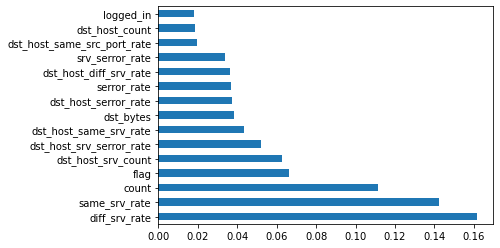

In [41]:
model = RandomForestClassifier()
model.fit(train_inputs, train_targets)
(pd.Series(model.feature_importances_, index=train_inputs.columns)
   .nlargest(15)
   .plot(kind='barh')) 

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(train_inputs[selected_feat], train_targets);

In [43]:
preds_rf = rf.predict(test_inputs[selected_feat])

In [44]:
from sklearn.metrics import accuracy_score
score_rf = accuracy_score(test_targets, preds_rf)
score_rf

0.9666865097536405

In [45]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(train_inputs[selected_feat], train_targets);

In [46]:
preds_dc = dc.predict(test_inputs[selected_feat])

In [47]:
score_dc = accuracy_score(test_targets, preds_dc)
score_dc

0.966434655188204

In [48]:
rf_1 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf_1.fit(train_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]], train_targets);

In [49]:
preds_rf_1 = rf_1.predict(test_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]])
score_rf_1 = accuracy_score(test_targets, preds_rf_1)
score_rf_1

0.9765546295448301

In [50]:
dc_1 = DecisionTreeClassifier()
dc_1.fit(train_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]], train_targets);

In [51]:
preds_dc_1 = dc_1.predict(test_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]])
score_dc_1 = accuracy_score(test_targets, preds_rf_1)
score_dc_1

0.9765546295448301

In [53]:
from sklearn.neighbors import KNeighborsClassifier


In [54]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_inputs[selected_feat], train_targets)
preds_knn = knn.predict(test_inputs[selected_feat])
score_knn = accuracy_score(test_targets, preds_knn)
score_knn

0.9661599047531825

In [56]:
knn_1 = KNeighborsClassifier(n_neighbors=7)
knn_1.fit(train_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]], train_targets)
preds_knn_1 = knn_1.predict(test_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]])
score_knn_1 = accuracy_score(test_targets, preds_knn_1)
score_knn_1

0.9764401501969044

In [57]:
knn_2 = KNeighborsClassifier(n_neighbors=15)
knn_2.fit(train_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]], train_targets)
preds_knn_2 = knn_2.predict(test_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]])
score_knn_2 = accuracy_score(test_targets, preds_knn_2)
score_knn_2

0.9764172543273194

In [59]:
knn_2 = KNeighborsClassifier(n_neighbors=3)
knn_2.fit(train_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]], train_targets)
preds_knn_2 = knn_1.predict(test_inputs[["diff_srv_rate", "same_srv_rate", "dst_host_same_srv_rate", "flag", "count", "dst_host_srv_count", "dst_host_srv_serror_rate"]])
score_knn_2 = accuracy_score(test_targets, preds_knn_2)
score_knn_2

0.9764401501969044